In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from pylab import *
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense
from keras.optimizers import SGD


/root/.local/share/canopy/edm/envs/env3point6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/.local/share/canopy/edm/envs/env3point6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/.local/share/canopy/edm/envs/env3point6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/.local/

In [13]:
# Generate data from -20, -19.75, -19.5, .... , 20
train_x = np.arange(-20, 20, 0.25)
# Calculate Target : sqrt(2x^2 + 1)
train_y = np.sqrt((2*train_x**2)+1)

In [ ]:
print(train_y)

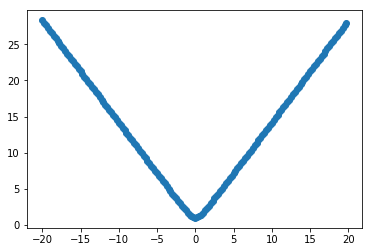

In [3]:
scatter(train_x, train_y)

In [4]:
# Create Network
inputs = Input(shape=(1,))
h_layer = Dense(1, activation='relu')(inputs)
#h_layer = Dense(9, activation='relu')(h_layer)
h_layer = Dense(8, activation='relu')(h_layer)
outputs = Dense(1, activation='linear')(h_layer)
model = Model(inputs=inputs, outputs=outputs)


In [5]:
# Optimizer / Update Rule
sgd = SGD(lr=0.001)
# Compile the model with Mean Squared Error Loss
model.compile(optimizer=sgd, loss='mse')


In [6]:
# Train the network and save the weights after training
hist = model.fit(train_x, train_y,
                 batch_size=20,
                 epochs=400, verbose=1)
model.save_weights('weights.h5')


Epoch 1/400
160/160 [==============================] - 0s 731us/step - loss: 155.2812
Epoch 2/400
160/160 [==============================] - 0s 72us/step - loss: 129.6387
Epoch 3/400
160/160 [==============================] - 0s 95us/step - loss: 125.6509
Epoch 4/400
160/160 [==============================] - 0s 67us/step - loss: 121.7310
Epoch 5/400
160/160 [==============================] - 0s 67us/step - loss: 117.7788
Epoch 6/400
160/160 [==============================] - 0s 71us/step - loss: 113.7622
Epoch 7/400
160/160 [==============================] - 0s 69us/step - loss: 109.6703
Epoch 8/400
160/160 [==============================] - 0s 64us/step - loss: 105.3865
Epoch 9/400
160/160 [==============================] - 0s 66us/step - loss: 101.0604
Epoch 10/400
160/160 [==============================] - 0s 53us/step - loss: 96.5145
Epoch 11/400
160/160 [==============================] - 0s 53us/step - loss: 91.9718
Epoch 12/400
160/160 [==============================] - 0s 51us/

160/160 [==============================] - 0s 67us/step - loss: 65.5625
Epoch 192/400
160/160 [==============================] - 0s 51us/step - loss: 65.7277
Epoch 193/400
160/160 [==============================] - 0s 54us/step - loss: 65.4662
Epoch 194/400
160/160 [==============================] - 0s 52us/step - loss: 65.5971
Epoch 195/400
160/160 [==============================] - 0s 67us/step - loss: 65.5713
Epoch 196/400
160/160 [==============================] - 0s 58us/step - loss: 65.4400
Epoch 197/400
160/160 [==============================] - 0s 54us/step - loss: 65.5878
Epoch 198/400
160/160 [==============================] - 0s 51us/step - loss: 65.4574
Epoch 199/400
160/160 [==============================] - 0s 48us/step - loss: 65.5961
Epoch 200/400
160/160 [==============================] - 0s 57us/step - loss: 65.4861
Epoch 201/400
160/160 [==============================] - ETA: 0s - loss: 55.83 - 0s 44us/step - loss: 65.4974
Epoch 202/400
160/160 [=====================

160/160 [==============================] - 0s 80us/step - loss: 65.6164
Epoch 378/400
160/160 [==============================] - 0s 66us/step - loss: 65.5437
Epoch 379/400
160/160 [==============================] - 0s 55us/step - loss: 65.4789
Epoch 380/400
160/160 [==============================] - 0s 58us/step - loss: 65.5005
Epoch 381/400
160/160 [==============================] - ETA: 0s - loss: 45.67 - 0s 47us/step - loss: 65.8274
Epoch 382/400
160/160 [==============================] - 0s 108us/step - loss: 65.5384
Epoch 383/400
160/160 [==============================] - 0s 60us/step - loss: 65.5685
Epoch 384/400
160/160 [==============================] - 0s 98us/step - loss: 65.4667
Epoch 385/400
160/160 [==============================] - 0s 101us/step - loss: 65.5004
Epoch 386/400
160/160 [==============================] - 0s 99us/step - loss: 65.5249
Epoch 387/400
160/160 [==============================] - 0s 113us/step - loss: 65.4972
Epoch 388/400
160/160 [==================

In [14]:
import h5py
filename = 'weights.h5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['dense_1', 'dense_2', 'dense_3', 'input_1']>


In [15]:
# Predict training data
predict = model.predict(np.array([26]))
print('f(26) = ', predict)

predict_y = model.predict(train_x)
print(predict_y)

f(26) =  [[14.171396]]
[[14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [14.171396]
 [

In [16]:
 print(predict)

[[14.171396]]


In [ ]:
outputs

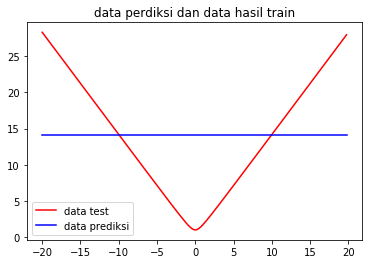

In [17]:
# Draw target vs prediction
plt.title('data perdiksi dan data hasil train')
plt.plot(train_x, train_y, 'r')
plt.plot(train_x, predict_y, 'b')
plt.legend(['data test', 'data prediksi'])
plt.show()

In [18]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

AttributeError: 'function' object has no attribute 'history'